# Inserción en Árboles Splay

La operación de inserción en un árbol Splay es una operación crítica que no solo añade un nuevo nodo al árbol sino que también aprovecha la oportunidad para reorganizar el árbol de manera que el nodo recién insertado se mueva cerca de la raíz. Esto se alinea con la estrategia general de los árboles Splay de mantener los elementos recientemente accedidos en posiciones de fácil acceso.

## Concepto de Inserción

La inserción en un árbol Splay sigue dos pasos principales:

1. **Inserción como en un Árbol de Búsqueda Binaria (BST):** Primero, el nuevo nodo se inserta siguiendo las reglas de un BST normal. Si el valor del nuevo nodo es menor que el valor del nodo actual y el nodo actual no tiene un subárbol izquierdo, el nuevo nodo se convierte en el subárbol izquierdo del nodo actual. Si el nodo actual tiene un subárbol izquierdo, el proceso se repite recursivamente en el subárbol izquierdo. Se sigue una lógica similar para el subárbol derecho si el valor del nuevo nodo es mayor.

2. **Operación de Splay:** Después de insertar el nuevo nodo, se realiza una operación de splay sobre este nodo. Esto significa que el nodo se "splayea" o se mueve a la raíz del árbol a través de una serie de rotaciones específicas (zig, zig-zig, zig-zag), optimizando así el árbol para accesos futuros.

## Recursos

<a href="https://www.cs.usfca.edu/~galles/visualization/SplayTree.html" target="_blank">visualization/SplayTree</a>

## Implementación en Python

In [1]:
# Código utilitario
from src.visualization import visualize_bt

In [2]:
class Node:
    def __init__(self, data):
        # Constructor de la clase Nodo.
        # 'data' contiene el valor almacenado en el nodo.
        # 'left' apunta al hijo izquierdo del nodo (None si no tiene).
        # 'right' apunta al hijo derecho del nodo (None si no tiene).
        # 'parent' apunta al nodo padre (None si es la raíz).
        self.data = data
        self.left = None
        self.right = None
        self.parent = None


class SplayTree:
    def __init__(self):
        # Constructor de la clase SplayTree.
        # Inicializa un árbol splay sin nodos, por lo tanto 'root' es None.
        self.root = None

    # ---- Sección: Métodos de Inserción ---- #

    def insert(self, data):
        # Insertar un nuevo dato en el árbol splay.
        # El método encuentra la posición correcta del nuevo nodo y luego realiza un 'splay' de este.
        print(f"Insertar: {data}")
        node = Node(data)
        y = None
        x = self.root

        # Buscar dónde insertar el nuevo nodo.
        while x:
            y = x
            if node.data < x.data:
                x = x.left
            else:
                x = x.right

        node.parent = y

        # Si el árbol estaba vacío, el nuevo nodo será la raíz.
        if y is None:
            self.root = node
        else:
            # Si el valor es menor, inserta a la izquierda, sino a la derecha.
            if node.data < y.data:
                y.left = node
            else:
                y.right = node

        # Una vez insertado el nodo, es necesario hacer un 'splay' para optimizar futuros accesos.
        self.splay(node)

    # ---- Sección: Métodos auxiliares de Inserción ---- #

    def rotate_left(self, x):
        # Realiza una rotación hacia la izquierda en el nodo x para reestructurar el árbol.
        # Este movimiento promueve el nodo derecho de x (y) a la posición de x,
        # Mientras que x se convierte en el hijo izquierdo de y.
        y = x.right
        x.right = y.left

        if y.left:
            y.left.parent = x

        y.parent = x.parent

        if not x.parent:
            print(f"Rotación izquierda: {x.data} ahora es la nueva raíz.")
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y

        y.left = x
        x.parent = y

    def rotate_right(self, x):
        # Realiza una rotación hacia la derecha en el nodo x para reestructurar el árbol.
        # Este movimiento promueve el nodo izquierdo de x (y) a la posición de x,
        # Mientras que x se convierte en el hijo derecho de y.
        y = x.left
        x.left = y.right

        if y.right:
            y.right.parent = x

        y.parent = x.parent

        if not x.parent:
            print(f"Rotación derecha: {x.data} ahora es la nueva raíz.")
            self.root = y
        elif x == x.parent.right:
            x.parent.right = y
        else:
            x.parent.left = y

        y.right = x
        x.parent = y

    # ---- Sección: Métodos auxiliares generales ---- #

    def splay(self, x):
        # Realiza la operación de 'splay' en el nodo x. El objetivo es traer el nodo x a la raíz del árbol,
        # mediante una serie de rotaciones, para optimizar tiempos de acceso futuros a este nodo.
        while x.parent:
            if not x.parent.parent:
                if x == x.parent.left:
                    print(f"Splay - rotación a la derecha (Zig): {x.data}")
                    self.rotate_right(x.parent)
                else:
                    print(f"Splay - rotación a la izquierda (Zag): {x.data}")
                    self.rotate_left(x.parent)
            elif x == x.parent.left and x.parent == x.parent.parent.left:
                print(
                    f"Splay - doble rotación a la derecha (Zig-Zig): {x.data}")
                self.rotate_right(x.parent.parent)
                self.rotate_right(x.parent)
            elif x == x.parent.right and x.parent == x.parent.parent.right:
                print(
                    f"Splay - doble rotación a la izquierda (Zag-Zag): {x.data}")
                self.rotate_left(x.parent.parent)
                self.rotate_left(x.parent)
            elif x == x.parent.right and x.parent == x.parent.parent.left:
                print(
                    f"Splay - rotación a la izquierda seguido de rotación a la derecha (Zag-Zig): {x.data}")
                self.rotate_left(x.parent)
                self.rotate_right(x.parent)
            else:
                print(
                    f"Splay - rotación a la derecha seguido de rotación a la izquierda (Zig-Zag): {x.data}")
                self.rotate_right(x.parent)
                self.rotate_left(x.parent)

Pruebas de Inserción

Insertar: 10


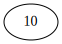

Insertar: 5
Splay - rotación a la derecha (Zig): 5
Rotación derecha: 10 ahora es la nueva raíz.


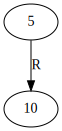

Insertar: 20
Splay - doble rotación a la izquierda (Zag-Zag): 20
Rotación izquierda: 5 ahora es la nueva raíz.
Rotación izquierda: 10 ahora es la nueva raíz.


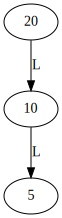

Insertar: 9
Splay - rotación a la izquierda seguido de rotación a la derecha (Zag-Zig): 9
Splay - rotación a la derecha (Zig): 9
Rotación derecha: 20 ahora es la nueva raíz.


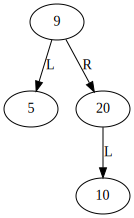

Insertar: 18
Splay - rotación a la izquierda seguido de rotación a la derecha (Zag-Zig): 18
Splay - rotación a la izquierda (Zag): 18
Rotación izquierda: 9 ahora es la nueva raíz.


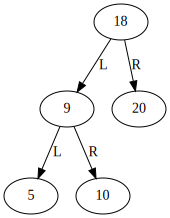

Insertar: 3
Splay - doble rotación a la derecha (Zig-Zig): 3
Splay - rotación a la derecha (Zig): 3
Rotación derecha: 18 ahora es la nueva raíz.


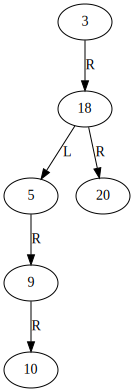

Insertar: 7
Splay - rotación a la derecha seguido de rotación a la izquierda (Zig-Zag): 7
Splay - rotación a la derecha seguido de rotación a la izquierda (Zig-Zag): 7
Rotación izquierda: 3 ahora es la nueva raíz.


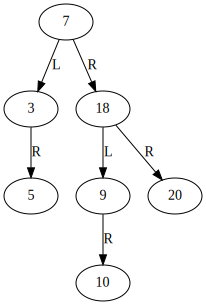

In [3]:
# Creación del árbol Splay y inserción de nodos
tree = SplayTree()
keys_to_insert = [10, 5, 20, 9, 18, 3, 7]
for key in keys_to_insert:
    tree.insert(key)
    # Visualizar el árbol
    dot = visualize_bt(tree)
    display(dot)

## Complejidad del Algoritmo

- **Complejidad de Tiempo:** La inserción en un árbol Splay tiene una complejidad de tiempo amortizada de O(log n), donde n es el número de nodos en el árbol. Esto se debe a la operación de splay que ajusta el árbol después de cada inserción.

- **Complejidad de Espacio:** La complejidad del espacio es O(n) para almacenar el árbol, pero la operación de inserción en sí misma requiere un espacio constante O(1), aparte del espacio utilizado por el árbol.

## Ejercicios Prácticos

1. Modifique la implementación anterior para que el árbol mantenga un contador de los nodos insertados y pruebe su funcionamiento insertando varios nodos.
2. Implemente una función que recorra el árbol en orden y muestre los valores de los nodos para verificar que la estructura del árbol después de varias inserciones es correcta.

Estos ejercicios ayudarán a profundizar la comprensión de la dinámica de inserción en árboles Splay y cómo esta afecta la estructura del árbol.